In [1]:
# import libraries

import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import os
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [0]:
# batch, classes, epochs

batch_size = 32
num_classes = 10
epochs = 50

In [3]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape: ', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 4s 0us/step
x_train shape:  (50000, 32, 32, 3)
50000 train samples
10000 test samples


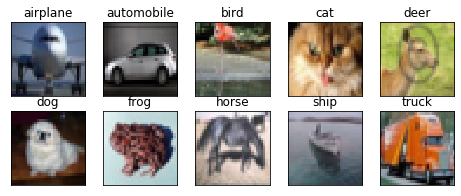

In [6]:
# plotting some random 10 images

class_names = ['airplane',
               'automobile',
               'bird',
               'cat',
               'deer',
               'dog',
               'frog',
               'horse',
               'ship',
               'truck']
               
fig = plt.figure(figsize=(8, 3))
for i in range(num_classes):
  ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
  idx = np.where(y_train[:] == i)[0]
  feature_idx = x_train[idx, ::]
  img_num = np.random.randint(feature_idx.shape[0])
  im = (feature_idx[img_num, ::])
  ax.set_title(class_names[i])
  plt.imshow(im)
plt.show()

In [0]:
# Convert class vectors to binary class metrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes) 

In [8]:
# model architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
#summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)       

In [10]:
# compile the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'sgd',
              metrics=['accuracy'])

# convert to float, normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [11]:
# train
model.fit(x_train, y_train, 
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/50





50000/50000 [==============================] - 27s 534us/step - loss: 2.0793 - acc: 0.2256 - val_loss: 2.0897 - val_acc: 0.2569
Epoch 2/50
50000/50000 [==============================] - 13s 260us/step - loss: 1.8010 - acc: 0.3483 - val_loss: 1.6145 - val_acc: 0.4221
Epoch 3/50
50000/50000 [==============================] - 13s 250us/step - loss: 1.6250 - acc: 0.4087 - val_loss: 1.5045 - val_acc: 0.4477
Epoch 4/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.4952 - acc: 0.4543 - val_loss: 1.3483 - val_acc: 0.5171
Epoch 5/50
50000/50000 [==============================] - 12s 248us/step - loss: 1.4035 - acc: 0.4899 - val_loss: 1.2739 - val_acc: 0.5429
Epoch 6/50
50000/50000 [==============================] - 12s 250us/step - loss: 1.3336 - acc: 0.5185 - val_loss: 1.2058 - val_acc: 0.5698
Epoch 7/50
500

Result : After 50 epochs, the difference between training and validation accuracy is low but the training is slow as compared to the model with batch normalization.  